In [1]:
import pandas as pd
import utils
import numpy as np
import os
import load_data


import matplotlib 
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import scipy.stats as stats
from collections import Counter



In [2]:
# 그래프 사이즈 조절
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

##  한글깨짐 설정 ##
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False
## 
####   ####   #####

In [24]:
# 그래프 저장 경로
fig_path = utils.fig_path

In [25]:
anal = load_data.df_per_b('train_with_outlier.csv', word_option=False) # 방송set 데이터프레임

In [26]:
def change_factor_name(df_):
    
    #요일
    days = {0:'월',
           1:'화',
           2:'수',
           3:'목',
           4:'금',
           5:'토',
           6:'일'}
    #계절
    season = {0:'봄',
             1:'여름',
             2:'가을',
             3:'겨울'}
    
    for i in df_.index:
        df_.loc[i,'요일'] = days[df_.loc[i,'요일']]
        df_.loc[i,'계절'] = season[df_.loc[i,'계절']]

In [27]:
def hour_new(df_):
    hour_to_idx = {6:0,
                   7:1,
                   8:2,
                   9:3,
                   10:4,
                   11:5,
                   12:6,
                   13:7,
                   14:8,
                   15:9,
                   16:10,
                   17:11,
                   18:12,
                   19:13,
                   20:14,
                   21:15,
                   22:16,
                   23:17,
                   0:18,
                   1:19,
                   2:20        
    }
    df_['시간대n']=0
    for i in df_.index:
        df_.loc[i,'시간대n'] = hour_to_idx[df_.loc[i,'시간대']]
        

In [28]:
change_factor_name(anal)
hour_new(anal)

# 상품군 별로 이상치 누가 많은지

In [29]:
# 이상치인 상품 추출
anal = anal[anal['outlier_b'].apply(lambda x: x in  [1,2])]

In [30]:
anal.reset_index(drop=True, inplace = True)

In [31]:
def freq_per_var_piechart(df, var):
    tmp = df[[var]]
    tmp = pd.DataFrame(tmp.groupby(var).size())
    tmp[var] = [i for i in tmp.index]
    tmp.reset_index(drop=True, inplace=True)
    colors=['aqua','azure','beige','chartreuse','coral','gold','lightblue','skyblue','pink','lavender','salmon']
    
    plt.pie(tmp[0], labels = tmp[var], autopct='%1.1f%%', startangle=140 ,colors=colors)
    plt.axis('equal')
    
    #draw circle
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    plt.title('{}별 이상치 빈도'.format(var))
    plt.savefig(fig_path+'그래프/취급액/이상치/상품군별 이상치 빈도.png', dpi=300,bbox_inches = 'tight')

    plt.show()

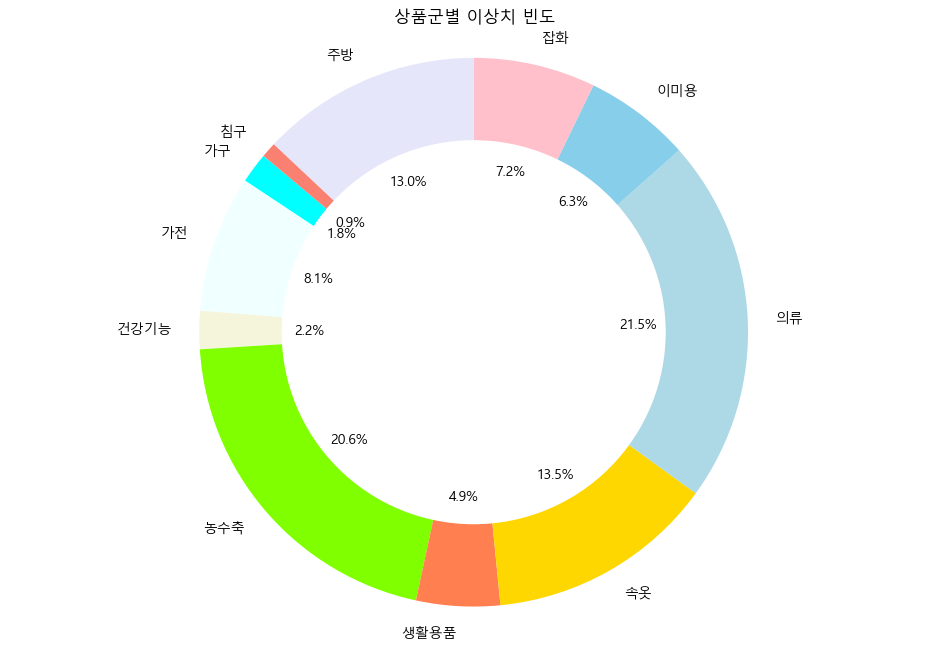

In [32]:
freq_per_var_piechart(anal, '상품군')

# 계절별

In [33]:
def freq_per_var(df, var):

    if var == '계절':
        tmp = df[['상품군',var]]
        tmp = pd.DataFrame(tmp.groupby([var,'상품군']).size())
        tmp[var] = [i[0] for i in tmp.index]
        tmp['상품군'] = [i[1] for i in tmp.index]
        tmp.columns= ['방송빈도',var,'상품군']
        tmp.reset_index(drop=True, inplace=True)

        s=sns.barplot(data=tmp, x=var, y='방송빈도', hue='상품군', palette='tab10',order=['봄','여름','가을','겨울'])
        s.legend(loc='right', bbox_to_anchor=(1.2, 0.5), ncol=1)
        plt.title('{}별 방송빈도'.format(var) ,size=15 )
        plt.savefig(fig_path+'그래프/취급액/이상치/계절별 방송빈도.png', dpi=300, bbox_inches = 'tight')
        plt.show()
        
    elif var == '요일':
        tmp = df[['상품군',var]]
        tmp = pd.DataFrame(tmp.groupby([var,'상품군']).size())
        tmp[var] = [i[0] for i in tmp.index]
        tmp['상품군'] = [i[1] for i in tmp.index]
        tmp.columns= ['방송빈도',var,'상품군']
        tmp.reset_index(drop=True, inplace=True)

        s=sns.barplot(data=tmp, x=var, y='방송빈도', hue='상품군', palette='tab10',order=['월','화','수','목','금','토','일'])
        s.legend(loc='right', bbox_to_anchor=(1.2, 0.5), ncol=1)
        plt.title('{}별 방송빈도'.format(var) )
        plt.savefig(fig_path+'그래프/취급액/이상치/요일별 방송빈도.png', dpi=300, bbox_inches = 'tight')

        plt.show()      
        
    else:
        tmp = df[['상품군',var]]
        tmp = pd.DataFrame(tmp.groupby([var,'상품군']).size())
        tmp[var] = [i[0] for i in tmp.index]
        tmp['상품군'] = [i[1] for i in tmp.index]
        tmp.columns= ['방송빈도',var,'상품군']
        tmp.reset_index(drop=True, inplace=True)

        s=sns.barplot(data=tmp, x=var, y='방송빈도', hue='상품군', palette='tab10')
        s.legend(loc='right', bbox_to_anchor=(1.2, 0.5), ncol=1)
        plt.title('{}별 방송빈도'.format(var) )
        plt.savefig(fig_path+'그래프/취급액/이상치/{}별 방송빈도.png'.format(var), dpi=300, bbox_inches = 'tight')
        plt.show()

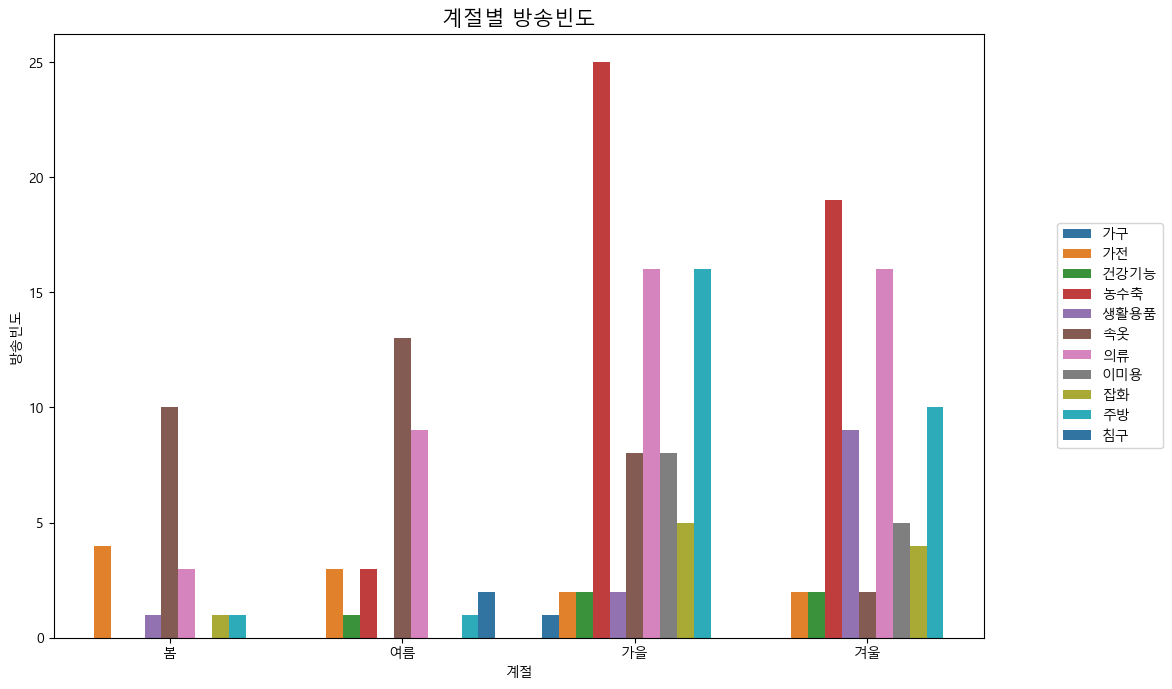

In [74]:
freq_per_var(anal, '계절')

# 월별

In [45]:
def freq_by_var_line(df_, var):    

    if var == '월':
        
        tmp = df_
        tmp= pd.DataFrame(tmp.groupby(by=[tmp['상품군'],tmp['월']]).size())
        tmp['상품군'] = [i[0] for i in tmp.index]
        tmp['월'] = [i[1] for i in tmp.index]
        tmp.columns=['방송빈도','상품군','월']
        tmp.reset_index(drop=True, inplace=True)
        
        
        s=sns.lineplot(x='월', y='방송빈도', hue='상품군', data=tmp, marker='o')
        s.legend(loc='right', bbox_to_anchor=(1.2, 0.5), ncol=1)
        plt.title('{}별 분당취급액 분포'.format(var), size=15)
        plt.savefig(fig_path+'그래프/취급액/이상치/{}별 분당취급액 분포.png'.format(var), dpi=300, bbox_inches = 'tight') 
        plt.show()
        
        
    if var == '시간대':
        tmp = df_
        tmp= pd.DataFrame(tmp.groupby(by=[tmp['상품군'],tmp['시간대']]).size())
        tmp['상품군'] = [i[0] for i in tmp.index]
        tmp['시간대'] = [i[1] for i in tmp.index]
        tmp.columns=['방송빈도','상품군','시간대']
        hour_new(tmp)
        tmp.reset_index(drop=True, inplace=True)


        s=sns.lineplot(x='시간대n', y='방송빈도', hue='상품군', data=tmp, marker='o')
        plt.xticks(list(dict.fromkeys(tmp['시간대n'].tolist())), list(dict.fromkeys(tmp['시간대'])))
        plt.xlabel('시간')
        plt.title('시간대별 방송빈도')
        plt.savefig(fig_path+'그래프/취급액/이상치/{}별 분당취급액 분포.png'.format(var), dpi=300,bbox_inches = 'tight')
        plt.show()

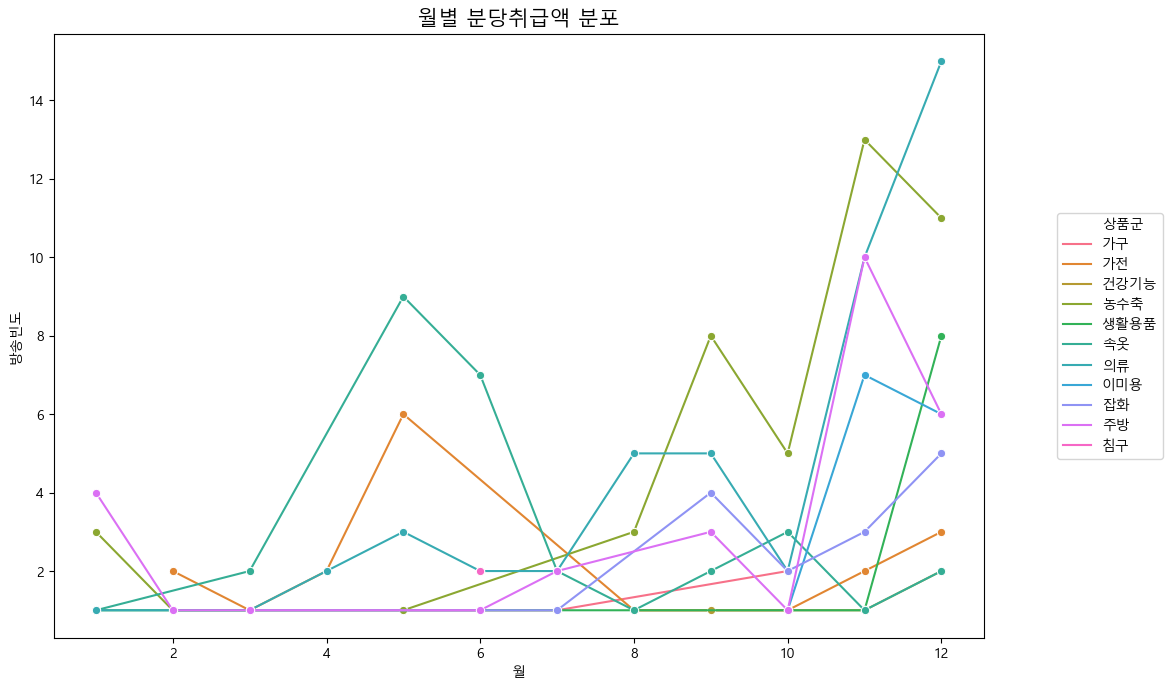

In [36]:
freq_by_var_line(anal, '월')

# 요일별

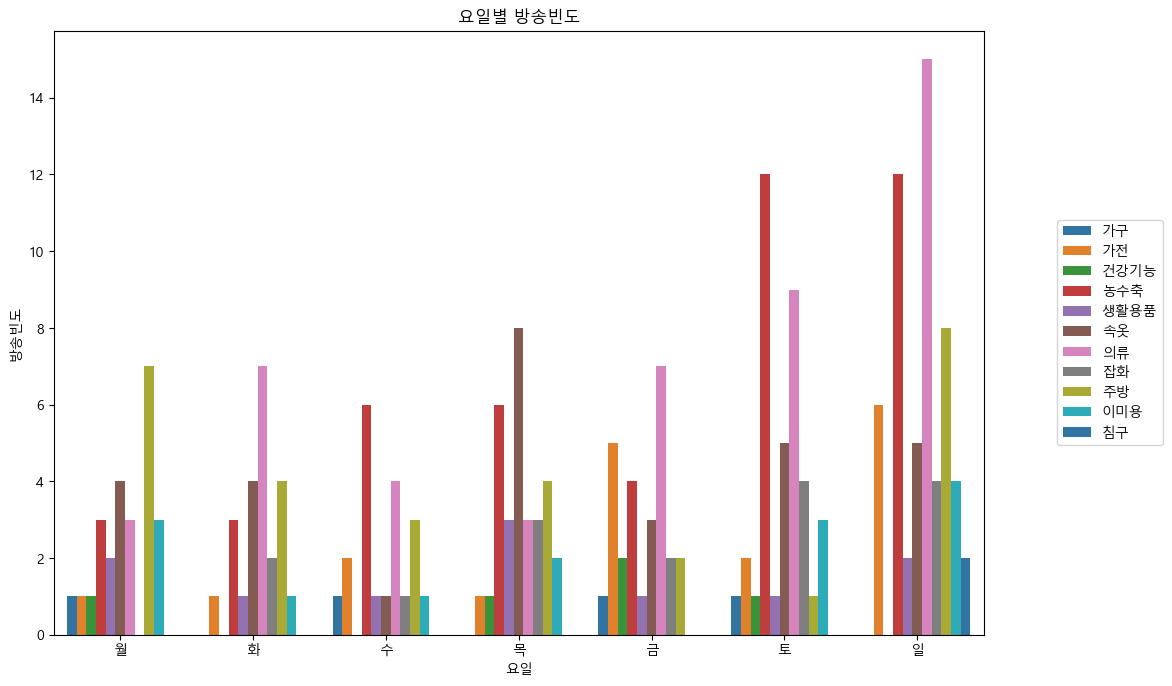

In [37]:
freq_per_var(anal, '요일')

        

# 시간대별

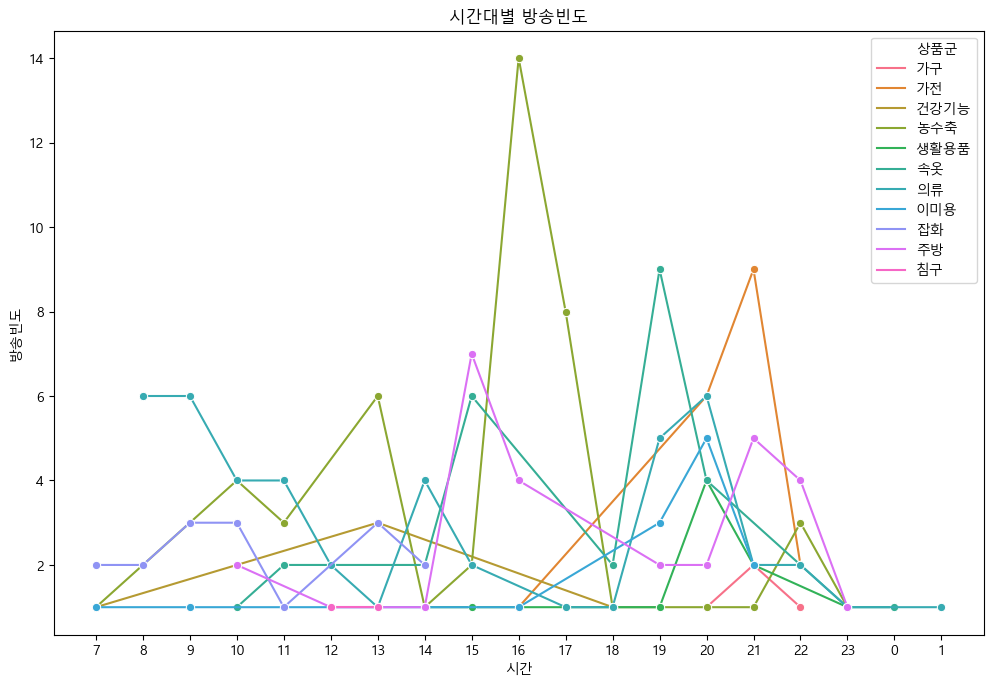

In [46]:
freq_by_var_line(anal,'시간대')